In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"R:\Entire_R_Data_Science_Projects\3.. Time_Series\Predict_Stock_Prices(Nifty_Bajaj)/BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [3]:
df.set_index('Date',inplace=True)

#### Plotting the target variable VWAP over time

<Axes: xlabel='Date'>

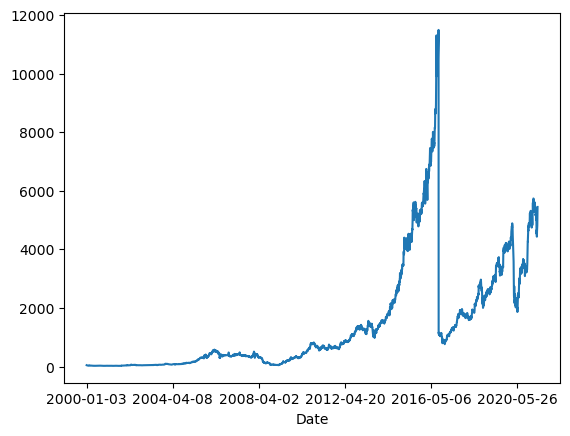

In [4]:
df['VWAP'].plot()

### so u can observe here some kind of Seasonality

### Data Pre-Processing

In [5]:
df.shape

(5235, 14)

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df.shape

(2456, 14)

In [10]:
data=df.copy()

In [11]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [12]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [13]:
data[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999558,0.999595,0.999240
High,0.999558,1.000000,0.999365,0.999691
Low,0.999595,0.999365,1.000000,0.999601
Close,0.999240,0.999691,0.999601,1.000000


In [14]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [19]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [20]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [21]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [22]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [23]:
data.shape

(2456, 34)

In [24]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [25]:
data.dropna(inplace=True)

In [26]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [27]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [28]:
data.shape

(2450, 34)

In [29]:
training_data=data[0:1800]
test_data=data[1800:]

In [30]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,88.954937,79.489416,83.341306,107.041856,696998.737787,642979.884199,1.827289e+14,1.673270e+14,2794.744413,21708.856675
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,63.129081,100.594924,24.113551,119.854378,483305.554092,570427.041296,1.375623e+14,1.467744e+14,21770.352164,17267.163548
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,23.818183,113.135709,8.146779,118.187686,734609.476628,584307.816124,2.020435e+14,1.561692e+14,30923.312263,24013.596897


In [26]:
## Install pmdarima

In [27]:
##!pip install pmdarima

## if pip install pmdarima fails to you, try as a user ( refer any one of the below commands in Jupyter Notebook ) :
## pip install pmdarima --user
## !pip install pmdarima==1.7.1 
## !pip install pmdarima==1.7.1 --user


## U can also refer Anaconda Prompt to download pmdarima , refer below command in Anaonda Prompt :
## conda install -c saravji pmdarima 
## (where c is name of my channel)


In [57]:
from pmdarima import auto_arima

In [29]:
import pmdarima
pmdarima.__version__

## 1.7.1
## U can encounter different pmdarima version !

'1.7.1'

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17180.261, Time=6.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17878.399, Time=3.89 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17495.738, Time=4.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17239.578, Time=5.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29569.396, Time=3.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=18192.169, Time=6.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17218.118, Time=5.96 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=17372.424, Time=7.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=17165.561, Time=7.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17164.363, Time=7.00 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=17208.280, Time=6.67 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=17166.359, Time=8.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17277.376, Time=6.21 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=17204.820, Time=7.40 sec
 ARIMA(2,0,4)(0,0,0

In [60]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

##  model.fit(y=training_data['VWAP'] , exogenous= training_data[ind_features])

ARIMA(order=(1, 0, 3), scoring_args={}, with_intercept=False)

In [62]:
# doing Forecast

forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

## forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [63]:
forecast

array([6367.45081598, 6394.34074152, 6532.75490041, 6604.61367737,
       6640.66794668, 6569.28843533, 6232.70243116, 6096.23902104,
       5960.27424948, 6083.6219814 , 6063.93791919, 6090.34168979,
       5970.69902507, 5857.70656456, 5754.51418301, 5555.67643312,
       5394.77731372, 5317.70461953, 5531.06978053, 5668.02171329,
       5812.67847594, 5775.66337492, 5758.8059842 , 5627.70167407,
       5524.2626592 , 5377.41753602, 5256.54659685, 5250.86865361,
       5283.7276813 , 5346.0112591 , 5388.10023427, 5396.78848294,
       5382.19580947, 5353.83359499, 5448.19222442, 5528.49341852,
       5586.85760085, 5607.06242578, 5636.1596772 , 5653.27277244,
       5647.18926659, 5627.40966248, 5613.54297282, 5652.90367881,
       5679.04564249, 5697.71042698, 5752.53529633, 5804.14613365,
       5817.57061358, 5829.22974558, 5834.17327109, 5906.26233363,
       5993.44965959, 6038.88405493, 6053.59269661, 6009.33899675,
       5919.1643179 , 5785.49930674, 5678.80301518, 5687.76426

In [64]:
test_data['Forecast_ARIMA']= forecast

In [65]:
test_data['Forecast_ARIMA']

Date
2018-09-11    6367.450816
2018-09-12    6394.340742
2018-09-14    6532.754900
2018-09-17    6604.613677
2018-09-18    6640.667947
                 ...     
2020-08-25    6429.722562
2020-08-26    6629.722885
2020-08-27    6655.671280
2020-08-28    6643.782224
2020-08-31    6512.257847
Name: Forecast_ARIMA, Length: 485, dtype: float64

<AxesSubplot:xlabel='Date'>

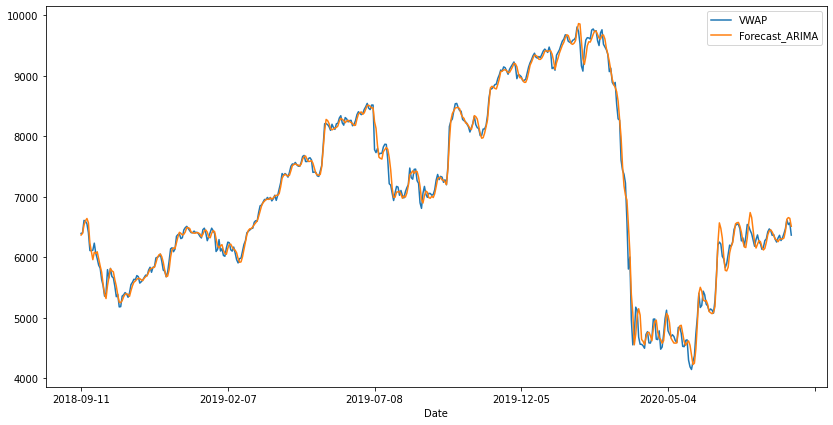

In [66]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

#### The Auto ARIMA model seems to do a fairly good job in predicting the stock price

#### Checking Accuracy of our model

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

120.21182040924319

In [37]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

79.96180280266465

In [ ]:
### mean, var, std--> gives worst prediction RMSE 1484, MAE 1228
### mean --> gives 122 RMSE, gives 82 MAE
### mean,std--> gives 120,79